In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
client

### 2. Generate a public token

In [6]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ["transactions", "income"])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'm7Pbb44BZ1sbB6b7Lm8pUpKmlwAynWcLXX6Nn',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'yyp55ooZzmfpgBp56Vd4FNp3JBgXAKiywwxme',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '9DZKKllgN3IqWAqD86L4uJPVaBGogkFRggj1Q',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [10]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
print(json.dumps(transaction_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "vykAA1179Gf7wK7qla9xtR4zPyVkrWFW11rmR",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-04-30",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 2. Print the categories for each transaction

In [11]:
# YOUR CODE HERE
categories_list = []

for transactions in transaction_response['transactions']:
    if transactions['category'] not in categories_list:
        categories_list.append(transactions['category'])

print(categories_list)    

[['Travel', 'Airlines and Aviation Services'], ['Travel', 'Taxi'], ['Food and Drink', 'Restaurants'], ['Payment'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Shops', 'Sporting Goods'], ['Payment', 'Credit Card'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Food and Drink', 'Restaurants', 'Coffee Shop'], ['Transfer', 'Credit']]


In [12]:
print(transaction_response['transactions'][25]['date'])

2020-03-15


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
transactions_df = pd.DataFrame(transaction_response['transactions'])
transactions_df = transactions_df.drop(['account_id', 'account_owner', 'authorized_date', 'category_id', 'iso_currency_code', 'location', 'payment_channel', 'payment_meta', 'pending', 'pending_transaction_id', 'transaction_code', 'transaction_id', 'transaction_type', "unofficial_currency_code"], axis=1)
transactions_df.head(5)  

,amount,category,date,name
0,500.00,"[Travel, Airlines and Aviation Services]",2020-04-30,United Airlines
1,6.33,"[Travel, Taxi]",2020-04-28,Uber
2,500.00,"[Food and Drink, Restaurants]",2020-04-25,Tectra Inc
3,2078.50,[Payment],2020-04-24,AUTOMATIC PAYMENT - THANK
4,500.00,"[Food and Drink, Restaurants, Fast Food]",2020-04-24,KFC


In [14]:
transactions_df['category'] = transactions_df['category'].apply(lambda x: x[0])
transactions_df

,amount,category,date,name
0,500.00,Travel,2020-04-30,United Airlines
1,6.33,Travel,2020-04-28,Uber
2,500.00,Food and Drink,2020-04-25,Tectra Inc
3,2078.50,Payment,2020-04-24,AUTOMATIC PAYMENT - THANK
4,500.00,Food and Drink,2020-04-24,KFC
5,500.00,Shops,2020-04-24,Madison Bicycle Shop
6,25.00,Payment,2020-04-15,CREDIT CARD 3333 PAYMENT *//
7,5.40,Travel,2020-04-15,Uber
8,5850.00,Transfer,2020-04-14,ACH Electronic CreditGUSTO PAY 123456
9,1000.00,Transfer,2020-04-14,CD DEPOSIT .INITIAL.


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
transactions_df["date"] = pd.to_datetime(transactions_df["date"])
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
amount      48 non-null float64
category    48 non-null object
date        48 non-null datetime64[ns]
name        48 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ KB


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [16]:
income_response = client.Income.get(access_token)
print(json.dumps(income_response['income'],indent=4, sort_keys=True))

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [17]:
print("The previous year's gross income is " + (json.dumps(income_response['income']["last_year_income"])))
print("The current monthly income is " + (json.dumps(income_response['income']['income_streams'][0]['monthly_income'])))
print("The projected yearly income is " + (json.dumps(income_response['income']["projected_yearly_income"])))

The previous year's gross income is 6000
The current monthly income is 500
The projected yearly income is 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [18]:
transactions_sum = transactions_df.groupby(["category"]).sum()
transactions_sum

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


In [19]:
transactions_count = transactions_df.groupby(["category"]).count()
transactions_count.drop(['date', 'name'], axis=1, inplace=True)
transactions_count = transactions_count.rename(columns={"amount" : "Number of Transactions"})
transactions_count

,Number of Transactions
category,
Food and Drink,15
Payment,6
Recreation,3
Shops,3
Transfer,9
Travel,12


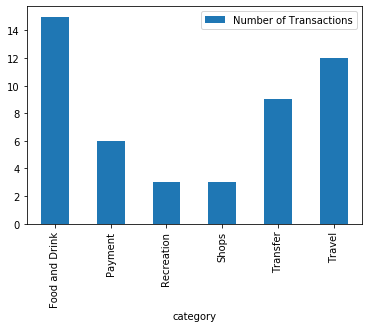

In [20]:
transactions_count.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262EE4CFAC8>],
      dtype=object)

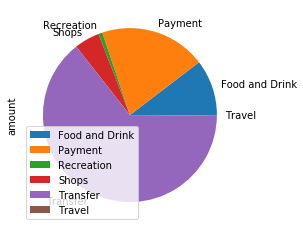

In [21]:
transactions_sum.plot.pie(subplots=True)

### Calculate the expenses per month

In [24]:
transactions_sum_bymonth = transactions_df.set_index('date').resample('m')['amount'].sum()
transactions_sum_bymonth


date
2020-02-29    10145.24
2020-03-31    11145.24
2020-04-30    10645.24
Freq: M, Name: amount, dtype: float64

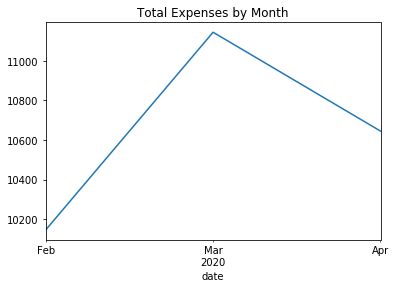

In [26]:
transactions_sum_bymonth.plot(title="Total Expenses by Month")